<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/PlanoDeSa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_data = pd.read_csv('/content/expenses.csv')
train_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
train_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
train_data.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


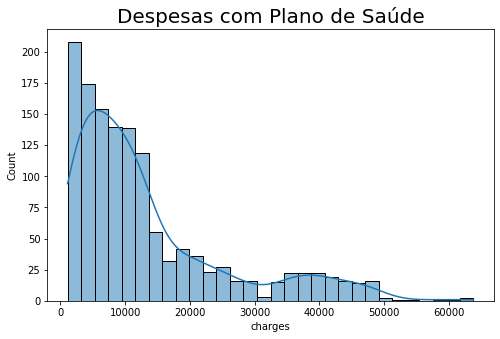

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


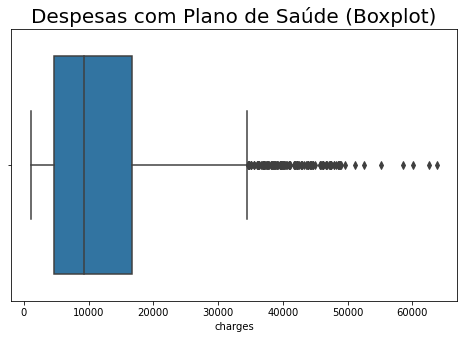

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=20)
plt.show()

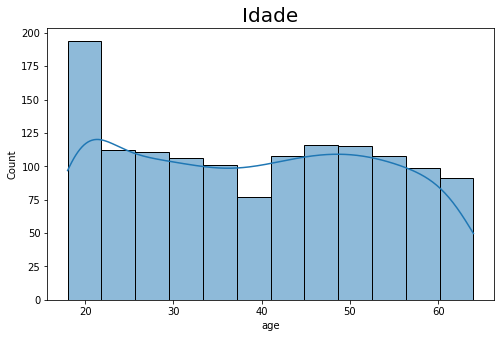

In [23]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


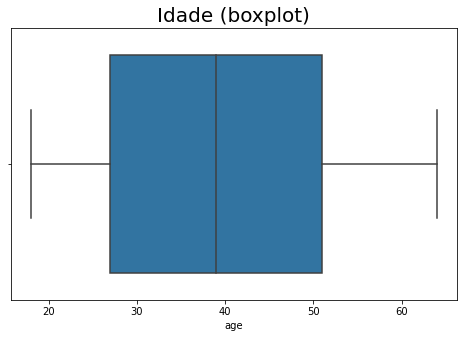

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade (boxplot)', fontsize=20)
plt.show()

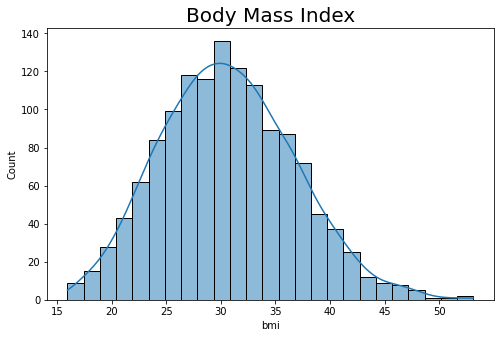

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


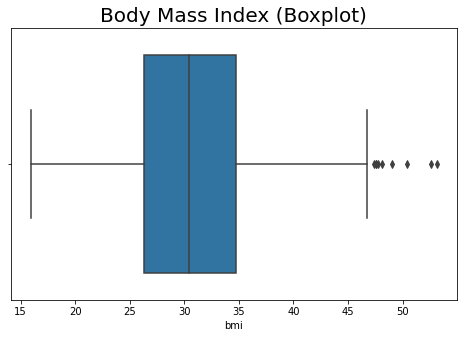

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

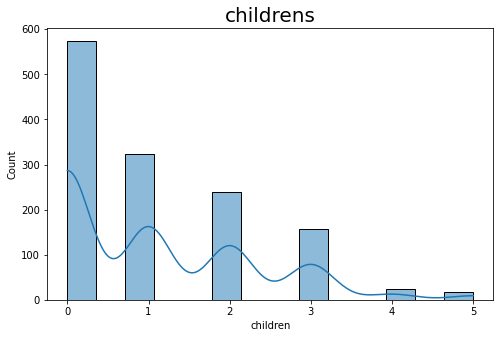

In [42]:

plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('childrens', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


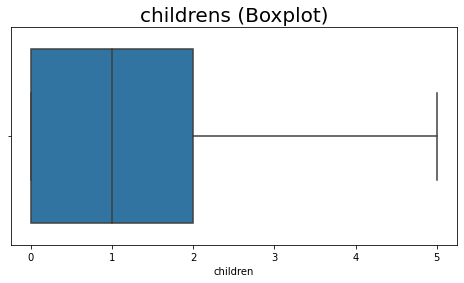

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(train_data['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

In [27]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [28]:
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


In [29]:
train_data = train_data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
train_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,19,0,1,27.90,0,0,0,1,16884.9240
1,18,1,0,33.77,1,0,1,0,1725.5523


In [32]:
X = train_data.drop('charges', axis= 1)
y = train_data['charges']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
# Importing métricas de avaliação:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7999876970680433
31827950.229523845


In [36]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.799622976364042
31885988.221409667


In [37]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7999368201139244
31836046.277315844


In [38]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8761845019341806
19702755.542109054


In [39]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))